<a href="https://colab.research.google.com/github/Drishtii24/DeepLearning2025-26-DrishtiChauhan/blob/main/ChurnModelling_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

28/01/2026

In [2]:
#load data
import pandas as pd

df = pd.read_csv("/content/Churn_Modelling.csv")
print(df.head(10))

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   
5          6    15574012       Chu          645     Spain    Male   44   
6          7    15592531  Bartlett          822    France    Male   50   
7          8    15656148    Obinna          376   Germany  Female   29   
8          9    15792365        He          501    France    Male   44   
9         10    15592389        H?          684    France    Male   27   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0       

In [3]:
#Drop irrelevant columns
df.drop(columns=["RowNumber", "CustomerId", "Surname"], inplace=True)

In [4]:
# encode categorical features
df["Gender"] = df["Gender"].map({"Male": 1, "Female": 0})

In [5]:
print(df.head())
print(df.info())

   CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France       0   42       2       0.00              1   
1          608     Spain       0   41       1   83807.86              1   
2          502    France       0   42       8  159660.80              3   
3          699    France       0   39       1       0.00              2   
4          850     Spain       0   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditSc

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [7]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical feature 'Geography'
le_geo = LabelEncoder()
df['Geography'] = le_geo.fit_transform(df['Geography'])

# Split features (X) and target (y)
X = df.drop('Exited', axis=1)
y = df['Exited']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
#Build ann model


model = Sequential()

model.add(Dense(10, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.2))

model.add(Dense(15, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(24, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(28, activation='relu'))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
#compile model

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [10]:
#training model

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32
)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7091 - loss: 0.5886 - val_accuracy: 0.8035 - val_loss: 0.4559
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7915 - loss: 0.4825 - val_accuracy: 0.8035 - val_loss: 0.4265
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7955 - loss: 0.4637 - val_accuracy: 0.8045 - val_loss: 0.4202
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7962 - loss: 0.4569 - val_accuracy: 0.8090 - val_loss: 0.4076
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7948 - loss: 0.4441 - val_accuracy: 0.8105 - val_loss: 0.4026
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8073 - loss: 0.4356 - val_accuracy: 0.8395 - val_loss: 0.3936
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8028 - loss: 0.4344 - val_accuracy: 0.8330 - val_loss: 0.3896
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8045 - loss: 0.4335 - val_accu

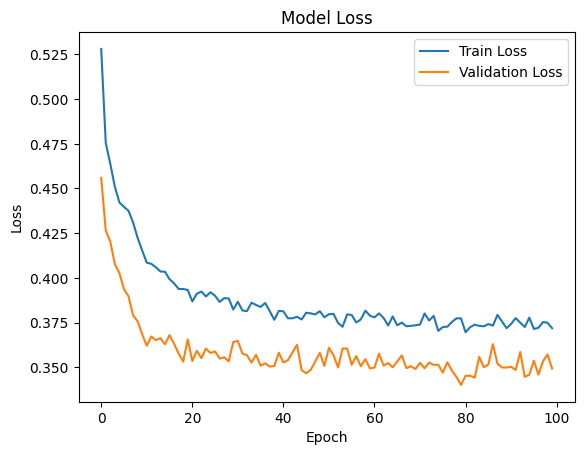

In [11]:
#loss graph

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

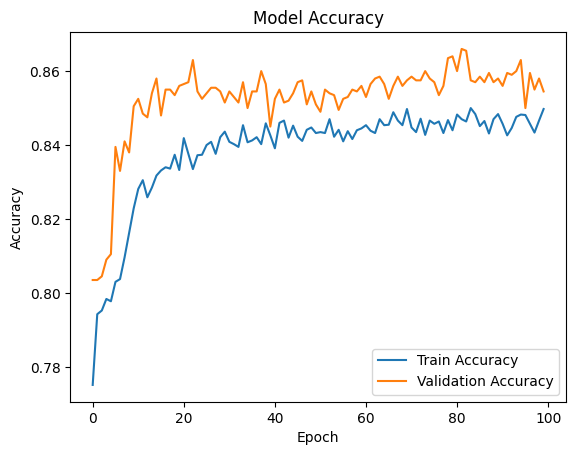

In [12]:
#accuracy graph

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


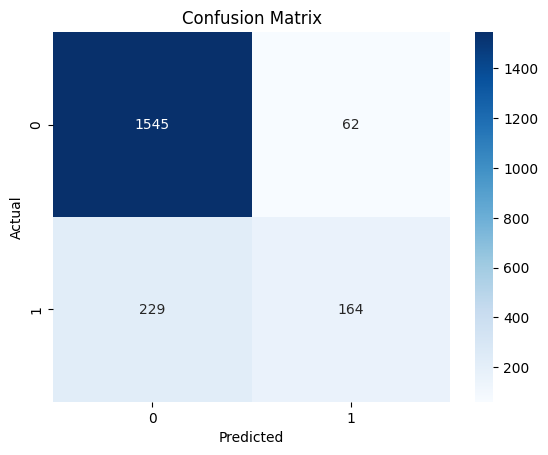

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1607
           1       0.73      0.42      0.53       393

    accuracy                           0.85      2000
   macro avg       0.80      0.69      0.72      2000
weighted avg       0.84      0.85      0.84      2000



In [13]:
#confusion matrix

y_pred = (model.predict(X_test) > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(classification_report(y_test, y_pred))

In [14]:
#save the model

model.save("churn_ann_model.h5")
print("Model saved successfully!")

Model saved successfully!
